### Convolve two N-dimensional arrays

In [3]:
import numpy as  np 

In [8]:
from scipy import signal
sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)


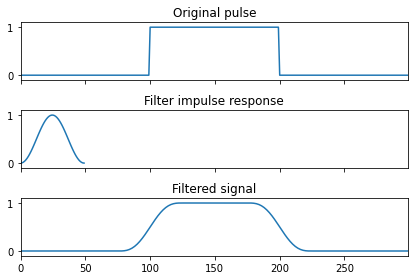

In [10]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()


In [5]:
import numpy as np
def convolve(x, y, hop_size):
    z = np.zeros(len(x) + len(y) + hop_size) # + hop_size -> avoids a special,
                                         # corner-case scenario

    Y = [np.fft.fft(y[i:i+hop_size], 2*hop_size) for i in xrange(0,\
        len(y)-hop_size, hop_size)]
    X = [np.fft.fft(x[i:i+hop_size], 2*hop_size) for i in xrange(0,\
        len(x)-hop_size, hop_size)]

    start_x = 0
    x_index = 0
    while start_x + hop_size < len(x):
        start_y = 0
        y_index = 0
        while start_y + hop_size < len(y):
            Z = X[x_index] * Y[y_index]
            z[start_x + start_y:start_x+start_y+2*hop_size] += np.real(np.fft.ifft(Z))
            start_y += hop_size
            y_index += 1

        start_x += hop_size
        x_index += 1

    return z

In [7]:
convolve(sig , win, 4) /sum(win)

NameError: name 'xrange' is not defined

https://www.gaussianwaves.com/2014/02/polynomials-convolution-and-toeplitz-matrices-connecting-the-dots/

https://towardsdatascience.com/hands-on-signal-processing-with-python-9bda8aad39de

https://klyshko.github.io/teaching/2019-02-22-teaching

https://staff.fnwi.uva.nl/r.vandenboomgaard/SP20162017/SystemsSignals/plottingsignals.html

https://www.it-jim.com/blog/audio-processing-basics-in-python/

https://www.gw-openscience.org/s/events/GW151226/LOSC_Event_tutorial_GW151226.html

https://www.upwork.com/services/product/development-it-matlab-and-python-based-digital-signal-processing-projects-1421409691842625536

https://bastibe.de/2012-11-02-real-time-signal-processing-in-python.html

https://levelup.gitconnected.com/how-to-code-a-biosignal-control-system-from-scratch-in-40-hours-54290c1eb0c7

https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

https://opensource.com/article/19/9/audio-processing-machine-learning-python

In [1]:
import numpy as np

# define the input and kernel arrays
input_array = [1, 2, 3]
kernel_array = [0, 1, 0]

# convolve the arrays
output_array = np.convolve(input_array, kernel_array, mode='same')

print(output_array)  # prints [0, 1, 2, 3, 0]


import scipy.signal as sig

sig.convolve(input_array,kernel_array,mode='same')

[1 2 3]


array([1, 2, 3])

In [ ]:

from __future__ import division
import numpy as np


def convolution_matrix(x, N=None, mode='full'):
    """Compute the Convolution Matrix
    This function computes a convolution matrix that encodes
    the computation equivalent to ``numpy.convolve(x, y, mode)``
    Parameters
    ----------
    x : array_like
        One-dimensional input array
    N : integer (optional)
        Size of the array to be convolved. Default is len(x).
    mode : {'full', 'valid', 'same'}, optional
        The type of convolution to perform. Default is 'full'.
        See ``np.convolve`` documentation for details.
    Returns
    -------
    C : ndarray
        Matrix operator encoding the convolution. The matrix is of shape
        [Nout x N], where Nout depends on ``mode`` and the size of ``x``. 
    Example
    -------
    >>> x = np.random.rand(10)
    >>> y = np.random.rand(20)
    >>> xy = np.convolve(x, y, mode='full')
    >>> C = convolution_matrix(x, len(y), mode='full')
    >>> np.allclose(xy, np.dot(C, y))
    True
    See Also
    --------
    numpy.convolve : direct convolution operation
    scipy.signal.fftconvolve : direct convolution via the
                               fast Fourier transform
    scipy.linalg.toeplitz : construct the Toeplitz matrix
    """
    x = np.asarray(x)
    if x.ndim != 1:
        raise ValueError("x should be 1-dimensional")

    M = len(x)
    N = M if N is None else N

    if mode == 'full':
        Nout = M + N - 1
        offset = 0
    elif mode == 'valid':
        Nout = max(M, N) - min(M, N) + 1
        offset = min(M, N) - 1
    elif mode == 'same':
        Nout = max(N, M)
        offset = (min(N, M) - 1) // 2
    else:
        raise ValueError("mode='{0}' not recognized".format(mode))

    xpad = np.hstack([x, np.zeros(Nout)])
    n = np.arange(Nout)[:, np.newaxis]
    m = np.arange(N)
    return xpad[n - m + offset]

https://medium.com/@ramitag18/performing-convolution-on-a-matrix-4682fd364591

https://www.ibm.com/cloud/learn/convolutional-neural-networks

https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-1-convolution-operation/

https://en.wikipedia.org/wiki/Convolution

In [1]:
import pytest
from numpy.testing import assert_allclose
import numpy as np
from convolution_matrix import convolution_matrix


@pytest.mark.parametrize('M', [10, 15, 20, 25])
@pytest.mark.parametrize('N', [10, 15, 20, 25])
@pytest.mark.parametrize('dtype', ['float', 'complex'])
@pytest.mark.parametrize('mode', ['full', 'same', 'valid'])
def test_convolution_matrix(M, N, dtype, mode):
    rand = np.random.RandomState(42)
    x = rand.rand(M)
    y = rand.rand(N)

    if dtype == 'complex':
        x = x * np.exp(2j * np.pi * rand.rand(M))
        y = y * np.exp(2j * np.pi * rand.rand(N))

    result1 = np.dot(convolution_matrix(x, len(y), mode), y)
    result2 = np.convolve(x, y, mode)
    assert_allclose(result1, result2)

ModuleNotFoundError: No module named 'convolution_matrix'